In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
if not Path("img").exists():
    Path("img").mkdir()
    print("Created img directory")

# Strong and Weak Scaling

In [4]:
strong_scaling_df = pd.read_csv('csv/strong_scaling.csv')
weak_scaling_df = pd.read_csv('csv/weak_scaling.csv')

In [5]:
strong_scaling_df['Average wct'] = strong_scaling_df.drop(columns=['p']).mean(axis=1)
weak_scaling_df['Average wct'] = weak_scaling_df.drop(columns=['p']).mean(axis=1)

In [6]:
strong_scaling_df['speedup'] = strong_scaling_df['Average wct'][0] / strong_scaling_df['Average wct']

In [7]:
strong_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,speedup
0,1,17.809143,17.663391,17.953560,17.897592,18.006745,17.866086,1.000000
1,2,8.973652,8.935018,9.023463,9.168871,8.949117,9.010024,1.982912
2,3,6.149002,6.056713,5.979848,6.029641,6.112340,6.065509,2.945521
3,4,4.555953,4.536744,4.608675,5.027658,4.535483,4.652903,3.839772
4,5,3.647222,3.627641,3.683883,3.640675,3.759971,3.671878,4.865653


In [8]:
strong_scaling_df['efficiency'] = strong_scaling_df['speedup'] / strong_scaling_df['p']

weak_scaling_df['efficiency'] = weak_scaling_df['Average wct'][0] / weak_scaling_df['Average wct']

In [9]:
strong_scaling_df.head(8)

,p,t1,t2,t3,t4,t5,Average wct,speedup,efficiency
0,1,17.809143,17.663391,17.953560,17.897592,18.006745,17.866086,1.000000,1.000000
1,2,8.973652,8.935018,9.023463,9.168871,8.949117,9.010024,1.982912,0.991456
2,3,6.149002,6.056713,5.979848,6.029641,6.112340,6.065509,2.945521,0.981840
3,4,4.555953,4.536744,4.608675,5.027658,4.535483,4.652903,3.839772,0.959943
4,5,3.647222,3.627641,3.683883,3.640675,3.759971,3.671878,4.865653,0.973131
5,6,3.191940,3.190471,3.173935,3.151094,3.448642,3.231216,5.529214,0.921536
6,7,2.729801,2.745566,2.744431,2.738646,2.666232,2.724935,6.556518,0.936645
7,8,2.308875,2.308668,2.341050,2.300657,2.293435,2.310537,7.732439,0.966555


In [10]:
weak_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,efficiency
0,1,18.065074,18.059620,17.824308,18.024192,18.119569,18.018553,1.000000
1,2,18.236221,18.201685,18.218846,18.359656,17.862095,18.175701,0.991354
2,3,18.171466,18.072812,18.156083,18.237471,17.919718,18.111510,0.994867
3,4,18.066265,18.055863,17.977102,18.141135,17.974279,18.042929,0.998649
4,5,18.234451,18.108715,18.227578,18.232251,18.053077,18.171214,0.991599


Plot the speedup with the theoretical linear speedup as a reference.

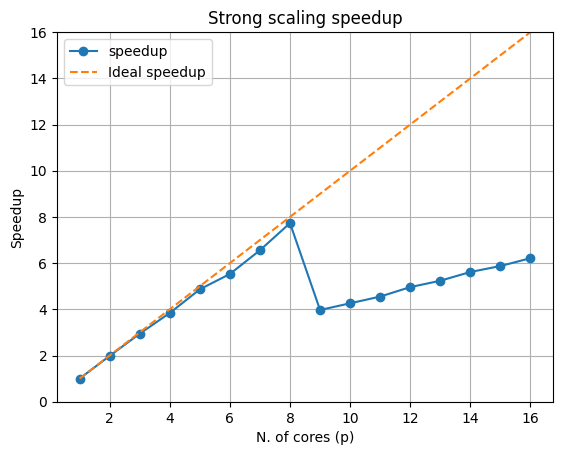

In [11]:
strong_scaling_df.plot(x='p', y='speedup', title='Strong scaling speedup', marker='o', ylim=(0, max(strong_scaling_df['p'])))
plt.plot(strong_scaling_df['p'], strong_scaling_df['p'], label='Ideal speedup', linestyle='--')
plt.xlabel('N. of cores (p)')
plt.ylabel('Speedup')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_speedup.svg', format='svg')
plt.show()

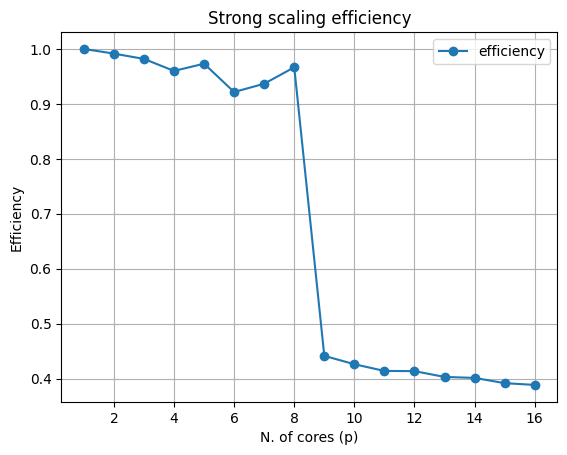

In [12]:
strong_scaling_df.plot(x='p', y='efficiency', title='Strong scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_efficiency.svg', format='svg')
plt.show()

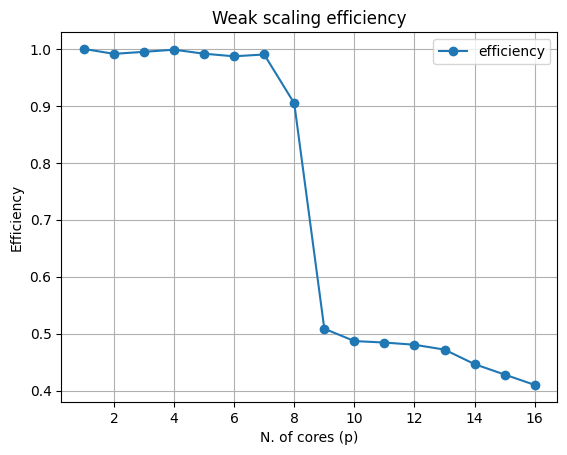

In [13]:
weak_scaling_df.plot(x='p', y='efficiency', title='Weak scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}weak_scaling_efficiency.svg', format='svg')
plt.show()

# CUDA Throughput

In [14]:
cuda_df = pd.read_csv('csv/cuda_perf1000.csv')

In [15]:
cuda_df.head()

,N,K,cpu_t1,cpu_t2,cpu_t3,cpu_t4,cpu_t5,gpu_t1,gpu_t2,gpu_t3,...,gpu_th1,gpu_th2,gpu_th3,gpu_th4,gpu_th5,gpu_th1_shared,gpu_th2_shared,gpu_th3_shared,gpu_th4_shared,gpu_th5_shared
0,65536,1000,0.145523,0.127258,0.142978,0.130755,0.123910,0.010080,0.011054,0.009427,...,6.501642e+06,5.928686e+06,6.952276e+06,6.902675e+06,7.248985e+06,3.153623e+07,2.760444e+07,3.258076e+07,3.179635e+07,3.440127e+07
1,131072,1000,0.244806,0.242389,0.247572,0.238748,0.255250,0.009950,0.009993,0.011281,...,1.317319e+07,1.311602e+07,1.161906e+07,1.344527e+07,1.317171e+07,4.740792e+07,4.719975e+07,4.179120e+07,4.756908e+07,4.724595e+07
2,262144,1000,0.479008,0.470932,0.488710,0.492386,0.477828,0.010721,0.012595,0.010878,...,2.445147e+07,2.081300e+07,2.409907e+07,2.470006e+07,2.483322e+07,6.537903e+07,5.660237e+07,6.263789e+07,6.435869e+07,6.424237e+07
3,524288,1000,0.952188,0.968082,0.954229,0.944171,0.923645,0.012979,0.011659,0.011879,...,4.039455e+07,4.496681e+07,4.413453e+07,4.389878e+07,4.434268e+07,7.310353e+07,8.246896e+07,8.310415e+07,8.159523e+07,8.216430e+07
4,1048576,1000,1.881055,1.911216,1.918760,1.905904,1.827417,0.014220,0.013827,0.014068,...,7.373820e+07,7.583281e+07,7.453466e+07,7.342492e+07,7.416274e+07,9.911294e+07,9.897506e+07,9.917651e+07,9.711398e+07,9.936182e+07


In [16]:
cuda_df['CPU Average wct'] = cuda_df[['cpu_t1','cpu_t2','cpu_t3','cpu_t4','cpu_t5']].mean(axis=1)
cuda_df['GPU Average wct'] = cuda_df[['gpu_t1','gpu_t2','gpu_t3','gpu_t4','gpu_t5']].mean(axis=1)
cuda_df['GPU Average wct shared'] = cuda_df[['gpu_t1_shared','gpu_t2_shared','gpu_t3_shared','gpu_t4_shared','gpu_t5_shared']].mean(axis=1)

cuda_df['CPU Average throughput'] = cuda_df[['cpu_th1','cpu_th2','cpu_th3','cpu_th4','cpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput'] = cuda_df[['gpu_th1','gpu_th2','gpu_th3','gpu_th4','gpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput shared'] = cuda_df[['gpu_th1_shared','gpu_th2_shared','gpu_th3_shared','gpu_th4_shared','gpu_th5_shared']].mean(axis=1) / 1000000

cuda_df['Speedup'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct']
cuda_df['Speedup shared'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct shared']

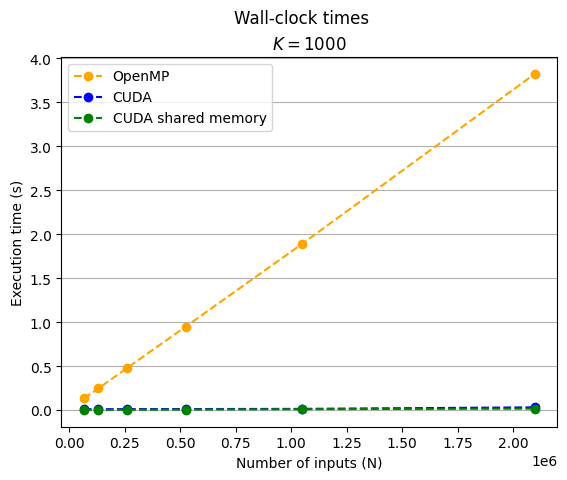

In [17]:
plt.plot(cuda_df['N'], cuda_df['CPU Average wct'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Wall-clock times')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.ylabel('Execution time (s)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_wct.svg', format='svg')
plt.show()

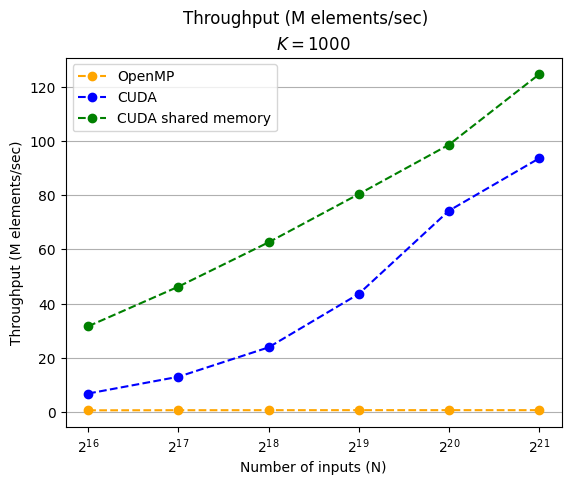

In [18]:
plt.plot(cuda_df['N'], cuda_df['CPU Average throughput'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Throughput (M elements/sec)')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xscale('log', base=2)
plt.ylabel('Throughput (M elements/sec)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_throughput.svg', format='svg')
plt.show()

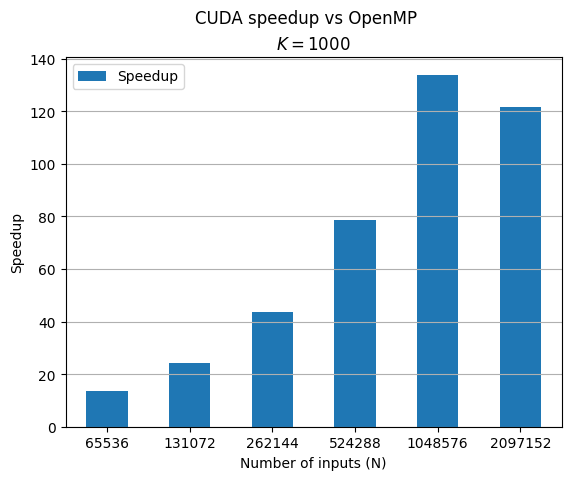

In [19]:
cuda_df.plot.bar(x='N', y='Speedup')
plt.suptitle('CUDA speedup vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup.svg', format='svg')
plt.show()

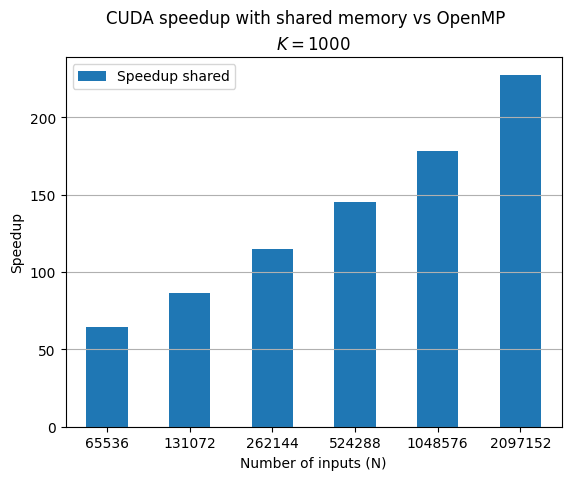

In [20]:
cuda_df.plot.bar(x='N', y='Speedup shared')
plt.suptitle('CUDA speedup with shared memory vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup_shared.svg', format='svg')
plt.show()

In [21]:
print(f"Speedup of CUDA for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup'].values[0]:.2f}")
print(f"Speedup of CUDA with shared memory for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup shared'].values[0]:.2f}")

Speedup of CUDA for N = 1048576: 133.90
Speedup of CUDA with shared memory for N = 1048576: 177.87
